In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('feb16-mar15_data/beneficiary/ai_registration-20210216-20210315.csv', sep='\t')

The variables that we do have in our registration data - 
1. age, parity, abortions, still-births 
2. Anaemia, Hypertension, Diabetes, C-Section, Other Complications

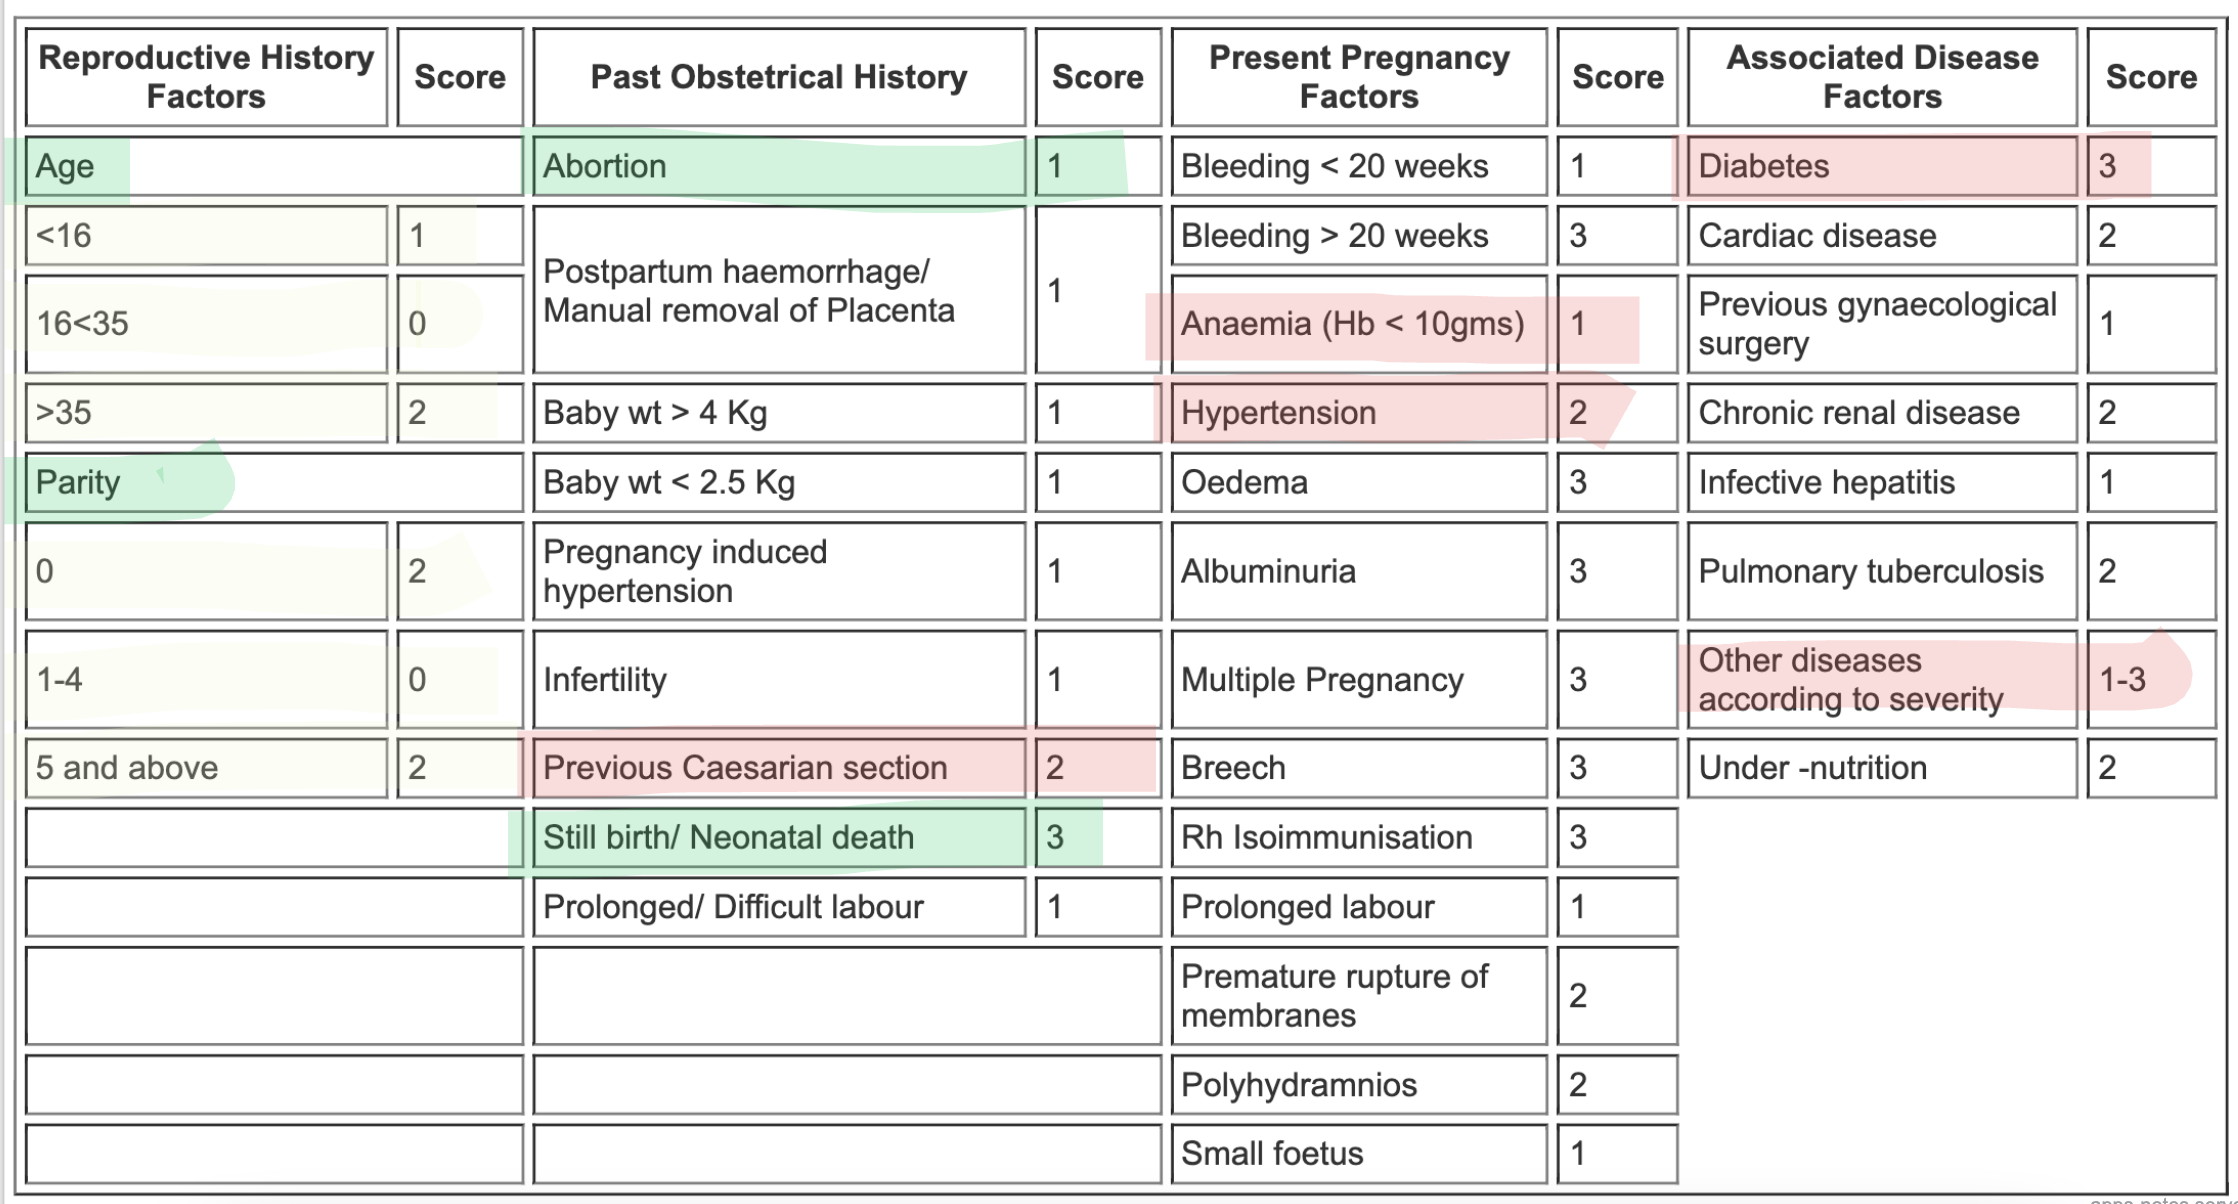

In [7]:
from IPython.display import Image
Image("/Users/vermashresth/Desktop/Screen Shot 2021-07-23 at 2.50.26 PM.png")

In [4]:
gpsla = df[['g', 'p', 's', 'l', 'a']]
gpsla.describe()

,g,p,s,l,a
count,23527.000000,23527.000000,23527.000000,23527.000000,23527.000000
mean,1.688358,0.680962,0.018107,0.646661,0.033026
std,1.159385,0.845632,0.168037,0.828478,0.227100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,1.000000,0.000000
max,11.000000,8.000000,6.000000,8.000000,6.000000


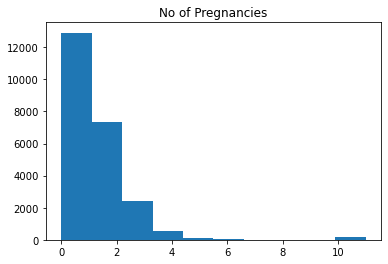

1     0.546011
2     0.311259
3     0.101585
4     0.023760
11    0.007353
5     0.005568
0     0.002805
6     0.001105
10    0.000213
7     0.000170
8     0.000170
Name: g, dtype: float64


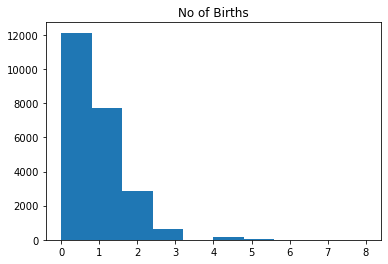

0    0.515620
1    0.329239
2    0.122413
3    0.025673
4    0.005738
5    0.001105
6    0.000128
7    0.000043
8    0.000043
Name: p, dtype: float64


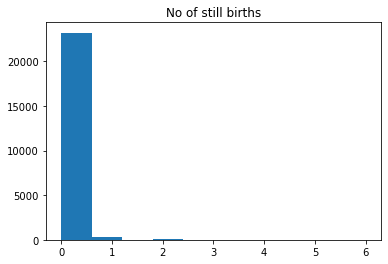

0.0    0.985889
1.0    0.010966
2.0    0.002550
3.0    0.000425
4.0    0.000128
6.0    0.000043
Name: s, dtype: float64


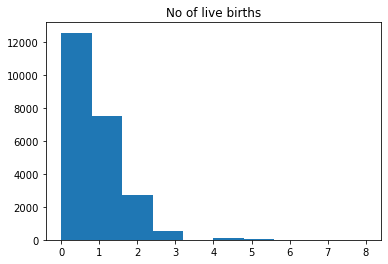

0    0.535215
1    0.320228
2    0.115144
3    0.022952
4    0.005271
5    0.001020
6    0.000128
8    0.000043
Name: l, dtype: float64


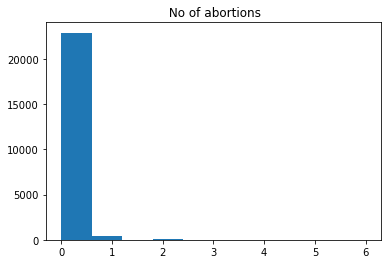

0    0.974412
1    0.019977
2    0.004208
3    0.001063
4    0.000298
6    0.000043
Name: a, dtype: float64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

descripts = ['No of Pregnancies', 'No of Births', 'No of still births', 'No of live births', ' No of abortions']
for risk, des in zip(gpsla.columns, descripts):
    plt.hist(gpsla[risk], bins=10)
    plt.title(f'{des}')
    plt.show()
    print(gpsla[risk].value_counts(normalize=True))

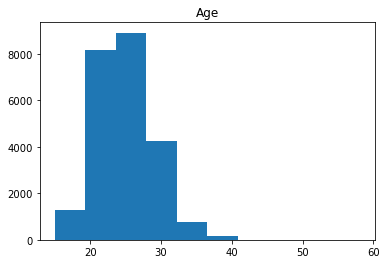

25    0.136864
24    0.094955
23    0.094742
22    0.089429
20    0.089259
26    0.088664
21    0.072555
28    0.060356
27    0.057933
30    0.049773
19    0.039444
29    0.034003
32    0.020105
31    0.016152
18    0.013219
35    0.010116
33    0.009648
34    0.008628
36    0.005016
38    0.002720
37    0.002040
40    0.001360
39    0.001318
17    0.000765
16    0.000213
42    0.000128
43    0.000128
45    0.000128
41    0.000085
15    0.000085
58    0.000043
56    0.000043
52    0.000043
51    0.000043
Name: age, dtype: float64


In [6]:
plt.hist(df['age'], bins=10)
plt.title('Age')
plt.show()
print(df['age'].value_counts(normalize=True))

In [7]:
df['low_parity'] = (df['p']==0).astype(int)
df['medium_parity'] = ((df['p']>0) & (df['p']<5)).astype(int)
df['high_parity'] = (df['p']>=5).astype(int)

print(f'Low parity: {np.round(df["low_parity"].sum()/df.shape[0]*100, 3)}% of population')
print(f'Medium Parity: {np.round(df["medium_parity"].sum()/df.shape[0]*100, 3)}% of population')
print(f'High Parity: {np.round(df["high_parity"].sum()/df.shape[0]*100, 3)}% of population')

Low parity: 51.562% of population
Medium Parity: 48.306% of population
High Parity: 0.132% of population


In [8]:
df['low_age'] = (df['age']<16).astype(int)
df['high_age'] = (df['age']>35).astype(int)
df['normal_age'] = ((df['age']>=16) & (df['age']<=35)).astype(int)

print(f'Low Age: {np.round(df["low_age"].sum()/df.shape[0]*100, 3)}% of population')
print(f'High Age: {np.round(df["high_age"].sum()/df.shape[0]*100, 3)}% of population')
print(f'Normal Age: {np.round(df["normal_age"].sum()/df.shape[0]*100, 3)}% of population')

Low Age: 0.009% of population
High Age: 1.309% of population
Normal Age: 98.682% of population


In [9]:
ppc_cols = [col for col in df.columns if col.startswith('ppc')]
df[ppc_cols] = df[ppc_cols].replace('\\N', np.nan)
df_ppc_summ = pd.DataFrame(columns=['Complication', 'Population %', 'Absolute Count'])
df_ppc_summ['Complication'] = (~df[ppc_cols].isna()).sum(axis=0).index
df_ppc_summ['Population %'] = ((~df[ppc_cols].isna()).sum(axis=0)/df.shape[0]*100).values
df_ppc_summ['Absolute Count'] = (~df[ppc_cols].isna()).sum(axis=0).values

df_ppc_summ['Population %'].sum()


1.1688698091554384

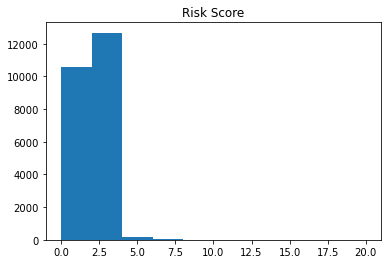

    index      risk
0     2.0  0.520466
1     0.0  0.440090
2     3.0  0.018489
3     1.0  0.009733
4     4.0  0.006673
5     6.0  0.002380
6     5.0  0.001190
7     9.0  0.000383
8     7.0  0.000213
9    12.0  0.000128
10    8.0  0.000085
11   20.0  0.000043
12   14.0  0.000043
13   10.0  0.000043
14   13.0  0.000043
2.0     0.929553
3.0     0.033022
1.0     0.017384
4.0     0.011918
6.0     0.004251
5.0     0.002126
9.0     0.000683
7.0     0.000380
12.0    0.000228
8.0     0.000152
20.0    0.000076
10.0    0.000076
14.0    0.000076
13.0    0.000076
Name: risk, dtype: float64


In [10]:

df['risk'] = df['low_age'] + 2* df['high_age'] \
             + 3*df['s'] + df['a'] \
             + 2*df['low_parity'] + 2*df['high_parity'] \
             + 2*(df['ppc_cesarean'].fillna(0)!=0).astype(int)
plt.hist(df['risk'], bins=10)
plt.title('Risk Score')
plt.show()
print(df['risk'].value_counts(normalize=True).reset_index())
print(df[df['risk']>0]['risk'].value_counts(normalize=True))


In [14]:
risk_summary = pd.DataFrame(columns = ['Risk Score', 'Population %', 'Absolute Count'])
risk_summary['Risk Score'] = np.sort(df['risk'].unique())
risk_summary['Population %'] = np.round(df['risk'].value_counts(normalize=True).loc[risk_summary['Risk Score']].values*100, 3)
risk_summary['Absolute Count'] = df['risk'].value_counts().loc[risk_summary['Risk Score']].values
risk_summary['Risk Score'] = risk_summary['Risk Score'].astype(int)
risk_summary

,Risk Score,Population %,Absolute Count
0,0,44.009,10354
1,1,0.973,229
2,2,52.047,12245
3,3,1.849,435
4,4,0.667,157
5,5,0.119,28
6,6,0.238,56
7,7,0.021,5
8,8,0.009,2
9,9,0.038,9


In [50]:
thresh = 4
risk_summary_short = risk_summary[risk_summary['Risk Score']<thresh]
risk_summary_short = risk_summary_short.append(
    {'Risk Score': f'{k} and Above',
     'Population %': risk_summary[risk_summary['Risk Score']>thresh-1]['Population %'].sum(),
     'Absolute Count': risk_summary[risk_summary['Risk Score']>thresh-1]['Absolute Count'].sum()}, ignore_index=True)
risk_summary_short

,Risk Score,Population %,Absolute Count
0,0,44.009,10354
1,1,0.973,229
2,2,52.047,12245
3,3,1.849,435
4,4 and Above,1.121,264


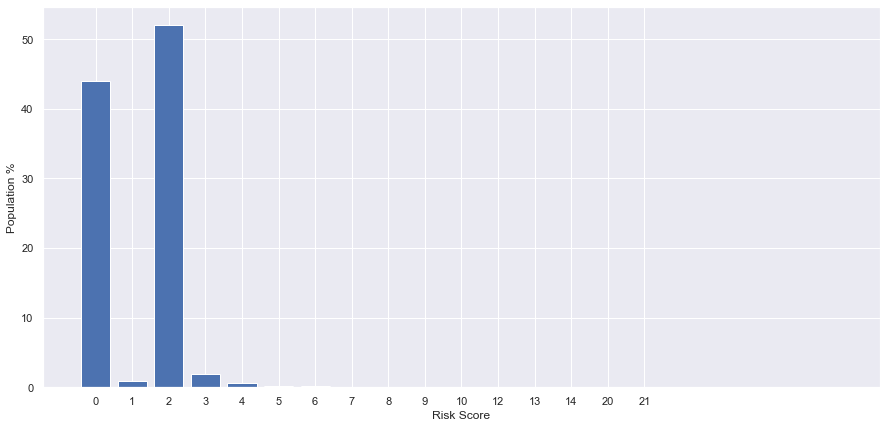

In [48]:
import seaborn as sns
sns.set()
plt.figure(figsize=(15, 7))
plt.bar(risk_summary['Risk Score'].values, risk_summary['Population %'].values)
plt.xlabel("Risk Score")
plt.ylabel('Population %')
plt.xticks(list(risk_summary.index.values)+ [15], list(risk_summary['Risk Score'].values)+[21])

plt.show()

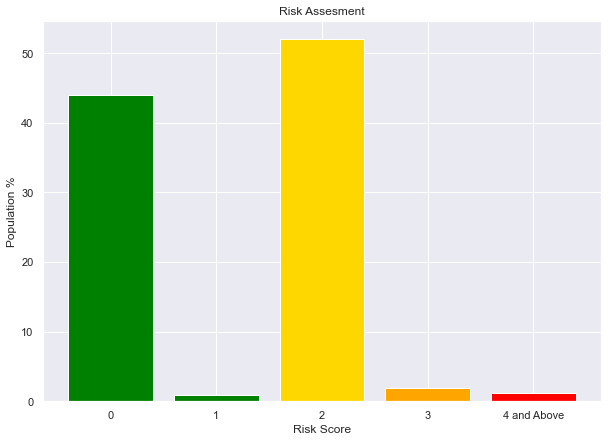

In [59]:
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 7))
plt.bar(risk_summary_short['Risk Score'].index.values,
        risk_summary_short['Population %'].values,
        color=['green']*(thresh-2)+['gold', 'orange', 'red'])
plt.xlabel("Risk Score")
plt.ylabel('Population %')
plt.xticks(risk_summary_short.index.values, risk_summary_short['Risk Score'].values)
plt.title('Risk Assesment')
plt.show()


In [46]:
df.sort_values('risk', ascending=False).fillna(0)[['risk', 'age', 'ppc_cesarean']+ list(gpsla.columns) ]

,risk,age,ppc_cesarean,g,p,s,l,a
12222,20.0,32,0,8,7,6.0,0,0
2150,14.0,36,0,5,4,4.0,0,0
10733,13.0,40,Cesarean,5,4,3.0,1,0
23435,12.0,26,0,5,4,4.0,0,0
7115,12.0,22,0,4,4,4.0,0,0
...,...,...,...,...,...,...,...,...
10314,0.0,33,0,4,3,0.0,3,0
10315,0.0,27,0,2,1,0.0,1,0
10318,0.0,30,0,3,2,0.0,2,0
10319,0.0,26,0,3,2,0.0,2,0


Potential Experiments

1. How long after registration are we first calling/intervening ? Note for both RMAB, Round Robin

2. Note Weekly drop prevention instead of cummulative. Why are returns diminishing after a few weeks?

3. Analyze
 -  if there are any patterns in how RMABs priortizes interventions, how does it decide who is to be intervened on? Can we derive a risk criterion based on RMABs priority? 
 - are interventions equitably distributed across clusters? We saw that returns diminish after 5 weeks - might be the case that RMABs are only focusing on clusters with very 'jumpy' tranisitions. This might even have fairness issue

4. How good are our estimated transition probablities as compared to actual ones?  (see control group beneficiaries, in pilot data)

5. Compare RMAB with an Expert baseline in simulation - Round Robin might be too simple/random